In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

In [2]:
# Load the dataset
df = pd.read_csv('creditcard.csv')

# Display the first 5 rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Remove duplicates
df = df.drop_duplicates()

# Handle outliers in the 'Amount' column
amount_upper_limit = df['Amount'].quantile(0.99)
df['Amount'] = df['Amount'].clip(upper=amount_upper_limit)

# Check data types
print(df.dtypes)

# Remove irrelevant features
constant_columns = [col for col in df.columns if df[col].nunique() == 1]
print(f"Constant columns: {constant_columns}")
df = df.drop(columns=constant_columns)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Number of duplicate rows: 1081
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
Constant col

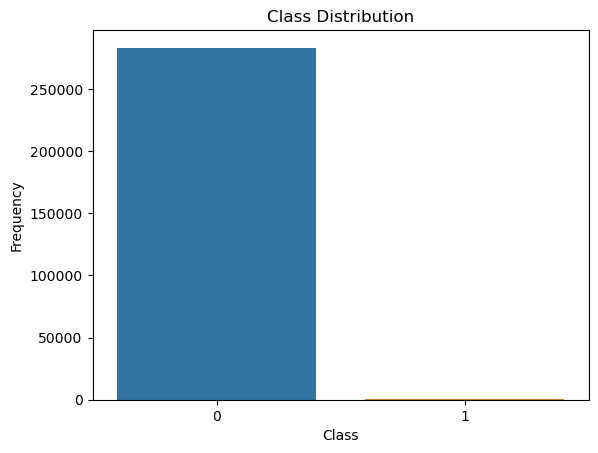

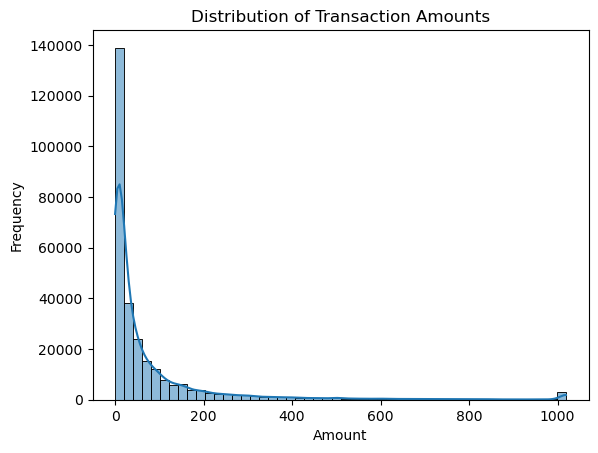

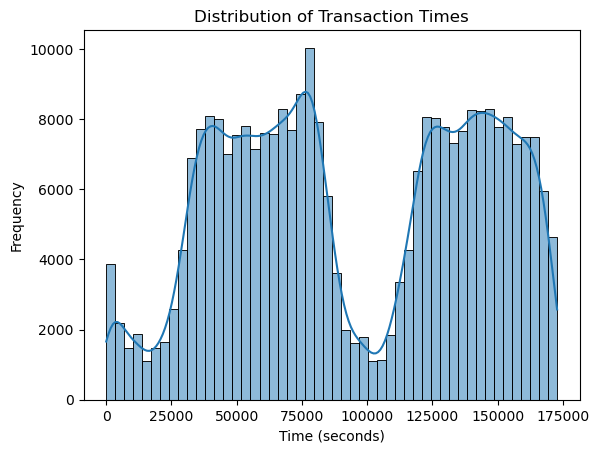

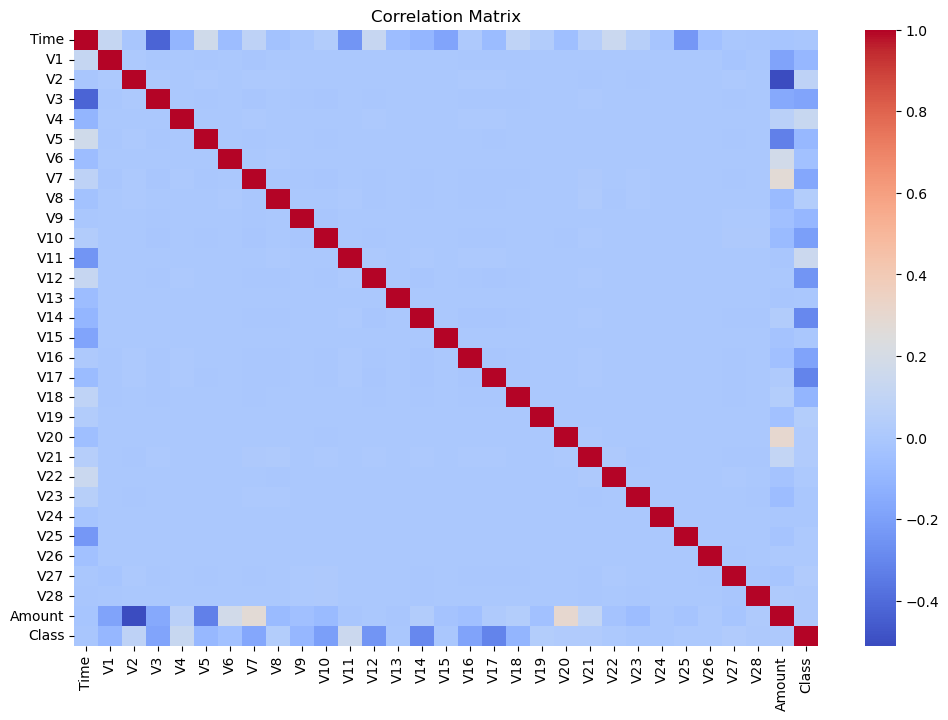

In [4]:
# Class distribution
class_counts = df['Class'].value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Transaction amount distribution
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# Time distribution
sns.histplot(df['Time'], bins=50, kde=True)
plt.title('Distribution of Transaction Times')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.show()

# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()

In [5]:
# Normalize 'Amount' and 'Time'
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df['Time'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1, 1))

# Split the data
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
# Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

# Random Forest 
print("Training Random Forest model...")
rf_model = RandomForestClassifier(n_estimators=10, random_state=42, n_jobs=-1)  # Reduced trees and parallel processing
rf_model.fit(X_train, y_train)
print("Model training completed.")
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_rf))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.86      0.59      0.70        95

    accuracy                           1.00     56746
   macro avg       0.93      0.79      0.85     56746
weighted avg       1.00      1.00      1.00     56746

Confusion Matrix:
[[56642     9]
 [   39    56]]
ROC AUC Score: 0.7946574083794684
Training Random Forest model...
Model training completed.
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.96      0.67      0.79        95

    accuracy                           1.00     56746
   macro avg       0.98      0.84      0.89     56746
weighted avg       1.00      1.00      1.00     56746

Confusion Matrix:
[[56648     3]
 [   31    64]]
ROC AUC Score: 0.8368156273545595


In [7]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Logistic Regression with SMOTE
model_smote = LogisticRegression()
model_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = model_smote.predict(X_test)
print("Logistic Regression with SMOTE Classification Report:")
print(classification_report(y_test, y_pred_smote))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_smote))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_smote))

# Random Forest with SMOTE
print("Training Random Forest model with SMOTE...")
rf_model_smote = RandomForestClassifier(n_estimators=10, random_state=42, n_jobs=-1)  # Reduced trees and parallel processing
rf_model_smote.fit(X_train_smote, y_train_smote)
print("Model training completed.")
y_pred_rf_smote = rf_model_smote.predict(X_test)
print("Random Forest with SMOTE Classification Report:")
print(classification_report(y_test, y_pred_rf_smote))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_smote))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_rf_smote))

Logistic Regression with SMOTE Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56651
           1       0.05      0.87      0.10        95

    accuracy                           0.97     56746
   macro avg       0.53      0.92      0.54     56746
weighted avg       1.00      0.97      0.99     56746

Confusion Matrix:
[[55178  1473]
 [   12    83]]
ROC AUC Score: 0.9238414521414126
Training Random Forest model with SMOTE...
Model training completed.
Random Forest with SMOTE Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.90      0.74      0.81        95

    accuracy                           1.00     56746
   macro avg       0.95      0.87      0.90     56746
weighted avg       1.00      1.00      1.00     56746

Confusion Matrix:
[[56643     8]
 [   25    70]]
ROC AUC Score: 0.868350444875317
